### Iris Dataset

#### Importing Libraries

In [1]:
#Import numpy for numerical operations
import numpy as np
#Import pandas for data handling
import pandas as pd
#Import matplotlib for creating plots
import matplotlib.pyplot as plt
#Import seaborn for better looking plots
import seaborn as sns

#import the dataset and machine learning tools
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Loading the Data
Get the Iris flower dataset having 3 different flower species

In [2]:
#Load teh built-in Iris dataset from sklearn
iris = datasets.load_iris()

#### Understanding the Data Structure

In [3]:
#Look at what's inside our dataset
print("What's in the dataset:")
print(list(iris.keys()))
print("\nFeature names (what we measure):")
print(iris.feature_names)
print("\nTarget names (what we predict):")
print(iris.target_names)

What's in the dataset:
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

Feature names (what we measure):
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names (what we predict):
['setosa' 'versicolor' 'virginica']


#### Creating a Data Frame (a Spreadsheet)

In [4]:
#Create a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#Add the species column
df['species'] = iris.target
#Add species names for easier understanding
df['species_name'] = df['species'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})

#### Basic Data Exploration

In [5]:
#Check the size of our dataset
print("Dataset shape (rows, columns):", df.shape)

#Look at the first 5 rows
print("\nFirst 5 rows of our data:")
print(df.head())

#Get basic statistics
print("\nBasic statistics (count, mean, std, etc.)")
print(df.describe())

#Check if we have missing data
print("\nMissing values in each column:")
print(df.isnull().sum())

#Check how many of each flower type we have
print("\nNumber of each flower species:")
print(df['species_name'].value_counts())

Dataset shape (rows, columns): (150, 6)

First 5 rows of our data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Basic statistics (count, mean, std, etc.)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   

#### Visualizing the Data

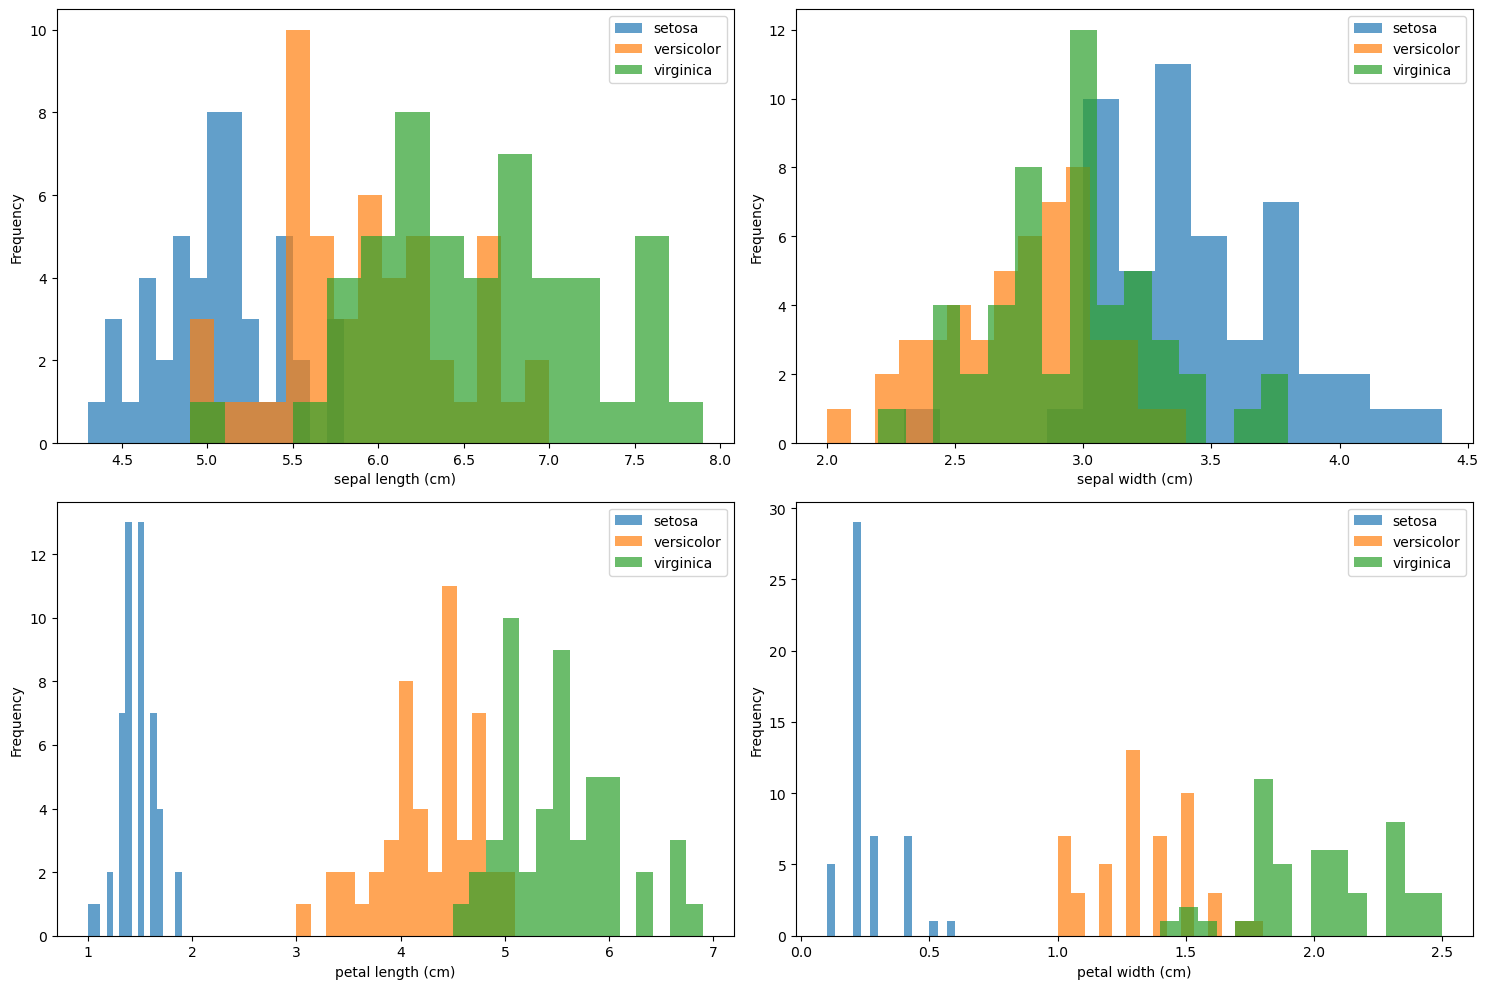

In [6]:
#creating a 2x2 grid of plots
plt.figure(figsize=(15,10))

#List of features we want to plot
features = iris.feature_names

#Create one subplot for each feature
for i, feature in enumerate(features):
    plt.subplot(2,2, i+1) #position in the 2x2 grid
    #Plot histogram for each species
    for species in df['species_name'].unique():
        plt.hist(df[df['species_name'] == species][feature], alpha=0.7, label=species, bins=15)
        plt.xlabel(feature) #X-axis label
        plt.ylabel('Frequency') #Y-axis label
        plt.legend() #Show which color is which species

#Adjust spacing between plots
plt.tight_layout()

#Display the plots
plt.show()

#### Correlation  Heatmap

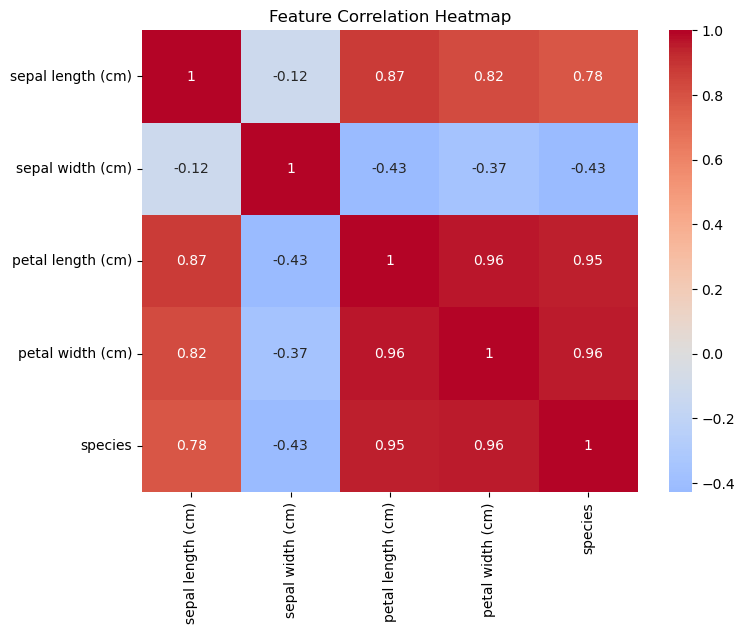

In [7]:
#Create a new figure
plt.figure(figsize=(8,6))

#Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

#Calculate how features relate to each other
correlation_matrix = numeric_df.corr()

#Create a colored heatmap to show correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Feature Correlation Heatmap")
plt.show()

#### Preparing Data for Machine Learning

In [8]:
#Separate features (X) or target (y)
#X = what we use to make predictions
X = df[iris.feature_names]
#y = what we want to predict
y = df['species']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,     #30% for testing, 70% for training
    random_state = 42, #makes the split reproducible
    stratify=y        #Keeps same proportion of species in both sets
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 105
Testing samples: 45


#### Scaling the Features

In [9]:
#Create a scaler object
scaler = StandardScaler()
#Fit the scaler to training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("After scaling:")
print(f"Training mean: {np.mean(X_train_scaled, axis=0)}")
print(f"Training std: {np.std(X_train_scaled, axis=0)}")

After scaling:
Training mean: [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
Training std: [1. 1. 1. 1.]


#### Importing Machine Learning Algorithm

In [10]:
# Import different classificatino algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#### Setting Up all Classifiers

In [11]:
#Creating  a dictionary of different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

#### Training and Evaluating Each Classifier

In [12]:
#creating a dictionary to store all results
results = {}

print("Training and Evaluating Classifiers")
print("="*50)

#Loop through each classifier
for name, clf in classifiers.items():
    print(f"Training {name}.... ")

    #Some algorithms need scaled data, others don't
    if name in ['Logistic Regression','SVM','K-Nearest Neighbors']:
        #train on scaled data
        clf.fit(X_train_scaled, y_train)
        #make predictions on scaled test data
        y_pred = clf.predict(X_test_scaled)
    else:
        #Train on original data
        clf.fit(X_train, y_train)
        #Make predictions on original test data
        y_pred = clf.predict(X_test)

    #Calculate accuracy (percentage of correct predictions)
    accuracy = accuracy_score(y_test, y_pred)
    
    #Store the result
    results[name] = accuracy
    #printing the accuracy
    print(f"{name}:{accuracy:.4f}")
    print("-"*30)


Training and Evaluating Classifiers
Training Logistic Regression.... 
Logistic Regression:0.9111
------------------------------
Training SVM.... 
SVM:0.9333
------------------------------
Training K-Nearest Neighbors.... 
K-Nearest Neighbors:0.9111
------------------------------
Training Decision Tree.... 
Decision Tree:0.9333
------------------------------
Training Random Forest.... 
Random Forest:0.8889
------------------------------
Training Naive Bayes.... 
Naive Bayes:0.9111
------------------------------


#### Comparing Results

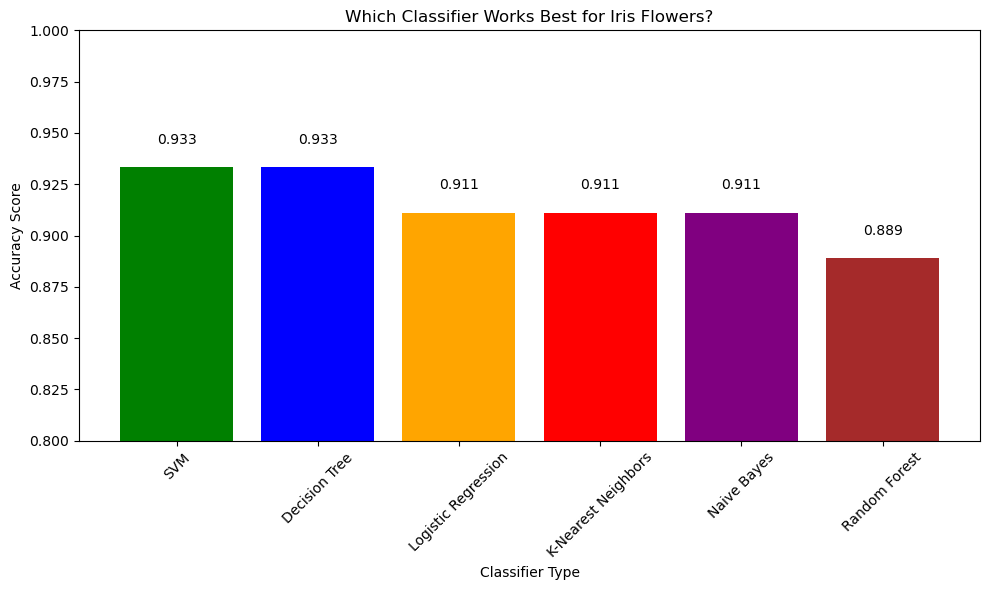

In [14]:
# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(list(results.items()), 
                         columns=['Classifier', 'Accuracy'])
# Sort from best to worst
results_df = results_df.sort_values('Accuracy', ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Classifier'], results_df['Accuracy'], 
               color=['green', 'blue', 'orange', 'red', 'purple', 'brown'])
plt.xlabel('Classifier Type')
plt.ylabel('Accuracy Score')
plt.title('Which Classifier Works Best for Iris Flowers?')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Set y-axis limits

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Detailed Analysis of Best Model

In [17]:
# Find the best performing classifier
best_classifier_name = results_df.iloc[0]['Classifier']
best_classifier = classifiers[best_classifier_name]

print(f"\n🏆 BEST PERFORMER: {best_classifier_name}")
print("=" * 40)

# Make sure we use scaled data if needed
if best_classifier_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
    best_classifier.fit(X_train_scaled, y_train)
    y_pred_best = best_classifier.predict(X_test_scaled)
else:
    best_classifier.fit(X_train, y_train)
    y_pred_best = best_classifier.predict(X_test)

# Show confusion matrix
print("Confusion Matrix (Rows=Actual, Columns=Predicted):")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Detailed performance report
print("\nDetailed Performance Report:")
print(classification_report(y_test, y_pred_best, 
                          target_names=iris.target_names))


🏆 BEST PERFORMER: SVM
Confusion Matrix (Rows=Actual, Columns=Predicted):
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

Detailed Performance Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



#### Making Predictions with Our Model

In [18]:
# Let's use our best model to predict new flowers
print("\nMaking Predictions on New Data")
print("=" * 40)

# Create some new flower measurements (sepal length, sepal width, petal length, petal width)
new_flowers = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Probably setosa
    [6.0, 2.7, 5.1, 1.6],  # Probably virginica
    [5.7, 2.8, 4.1, 1.3]   # Probably versicolor
])

# Scale if needed and make predictions
if best_classifier_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
    new_flowers_scaled = scaler.transform(new_flowers)
    predictions = best_classifier.predict(new_flowers_scaled)
else:
    predictions = best_classifier.predict(new_flowers)

# Print results
for i, pred in enumerate(predictions):
    print(f"Flower {i+1}: Predicted as {iris.target_names[pred]}")


Making Predictions on New Data
Flower 1: Predicted as setosa
Flower 2: Predicted as virginica
Flower 3: Predicted as versicolor


C:\Users\vik43\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
